In [1]:
import numpy as np
import matplotlib.pyplot as plt

![title](./grating_definition.png)

# Define functions

In [2]:
# Define function for the transmission efficiency for the zero's order
def transmission_m(k, m, n, h, a, b):
    """
    k: Wave number of the photon = 2 * pi * c / lambda
    m: The order of diffraction
    n: The complex refraction index.
    h: The height of the tooth.
    a: The width of the groove.
    b: The width of the tooth.
    """
    
    if not isinstance(m, int):
        raise Exception("m is the order of diffraction. This value has to be an integer.")
    if not isinstance(n, complex):
        raise Exception("n is the complex refraction index. This value has to be a complex number.")
    
    # First consider diffractions that are not the zeroth order.
    if m != 0:
        # Get the real part and the imaginary part of the refraction coefficient
        n_re = n.real - 1
        n_im = n.imag

        term_1 = 1 - np.exp(-k*h*n_im) * (np.cos(k*h*n_re) + 1.j * np.sin(k*h*n_re))
        term_2 = 1 - np.cos(2*np.pi*b*m/(a+b)) + np.sin(2*np.pi*b*m /(a+b))

        transmission = np.square(np.abs(term_1 * term_2)) / (4 * (np.pi * m)**2 )
        
    # Then consider the zeroth order
    else:
        # Get the real part and the imaginary part of the refraction coefficicent
        n_re = n.real - 1
        n_im = n.imag

        term_1 = (b + a * np.exp(-k*h*n_im) * (np.cos(k*h*n_re) + 1.j * np.sin(k*h*n_re))) / (a + b)

        transmission = np.square(np.abs(term_1))
    
    return transmission


# Define variables

In [3]:
# Speed of light * reduced Planck constant
c_h_bar = 2.99792458 * 6.582119569 * 1e-8

# Define photon energy and wave vector
photon_energy = 10000  #(eV)
k = photon_energy / c_h_bar

# Define the groove width
b = 1e-6  # (m)

# Define the tooth width
a = 1e-6  # (m)

# Define the refraction coefficent
n = 1 - 0.73031 * 1e-5 + 1.j * 0.61521 * 1e-8
#n = 1 -  7.29524527E-06 + 1.j * 7.61694174E-09

# Define a series of height
h = np.arange(1000) * 1e-8   # The unit is m. The smallest tooth height is 10nm.

In [4]:
zero_trans = transmission_m(k = k, m = 0, n = n, h = h, a = a, b = b)
one_trans = transmission_m(k = k, m = 1, n = n, h = h, a = a, b = b)

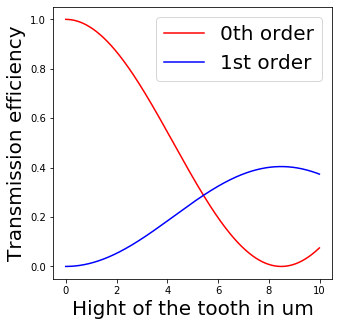

In [5]:
plt.figure(figsize=(5, 5))

# Change the x axis unit into um
plt.plot(h * 1e6, zero_trans, 'r')
plt.plot(h * 1e6, one_trans, 'b')

plt.xlabel("Hight of the tooth in um", fontsize=20)
plt.ylabel("Transmission efficiency", fontsize=20)
plt.legend(["0th order", "1st order"], fontsize=20)


plt.show()